In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

1. Overview of the Dataset:

    What are the first few rows of the dataset? (Useful for a general overview)

In [81]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10


2. Data Distribution:

    What is the distribution of electric vehicles across different states?

In [82]:
distribution_by_state = df.groupby(["State"]).size().reset_index(name="Number of Electric Vehicles")
distribution_by_state

,State,Number of Electric Vehicles
0,AK,1
1,AL,3
2,AP,1
3,AR,2
4,AZ,10
5,BC,2
6,CA,91
7,CO,11
8,CT,7
9,DC,4


In [83]:
# state with the highest number of electric vehicle
distribution_by_state.iloc[distribution_by_state["Number of Electric Vehicles"].idxmax()]

State                              WA
Number of Electric Vehicles    153491
Name: 41, dtype: object

In [84]:
# state with the lowest number of electric vehicle
distribution_by_state.loc[distribution_by_state["Number of Electric Vehicles"] == distribution_by_state["Number of Electric Vehicles"].min()]

,State,Number of Electric Vehicles
0,AK,1
2,AP,1
10,DE,1
14,IA,1
23,MN,1
25,MS,1
26,MT,1
29,NH,1
34,OK,1
42,WY,1


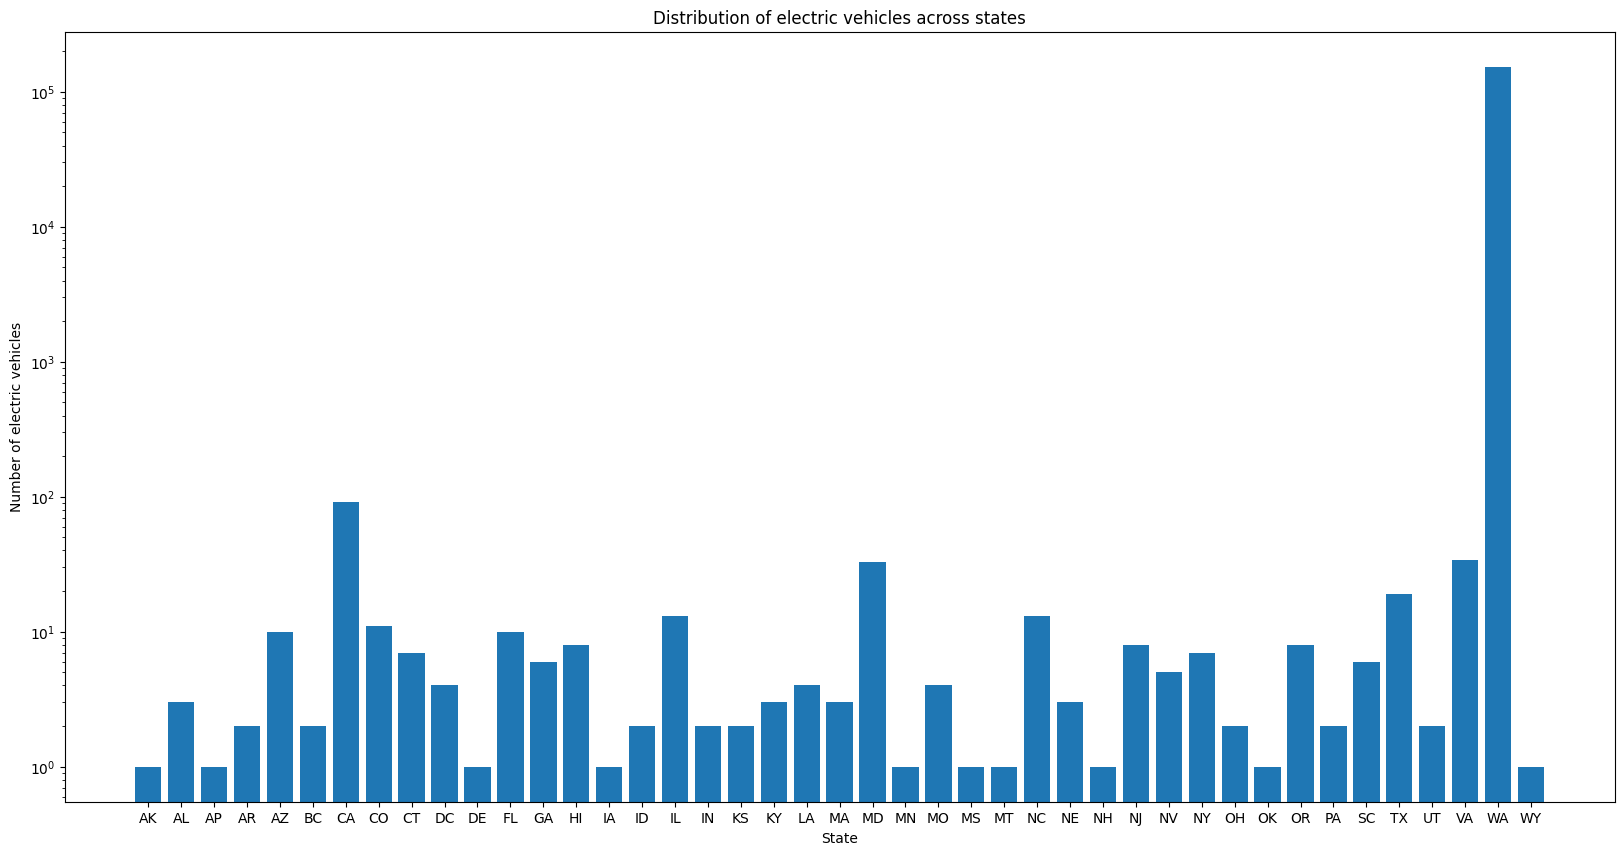

In [85]:
plt.figure(figsize=(20,10))
plt.bar(distribution_by_state["State"],distribution_by_state["Number of Electric Vehicles"],log=True)
plt.xlabel("State")
plt.ylabel("Number of electric vehicles")
plt.title("Distribution of electric vehicles across states")
plt.show()

3. Model Year Breakdown:

    How many electric vehicles are there for each model year?

In [86]:
vehicles_per_model = df.groupby("Model").size().reset_index(name="Number of vehicles per model")
vehicles_per_model

,Model,Number of vehicles per model
0,330E,433
1,500,797
2,530E,415
3,740E,31
4,745E,6
...,...,...
122,X3,294
123,X5,2112
124,XC40,879
125,XC60,970


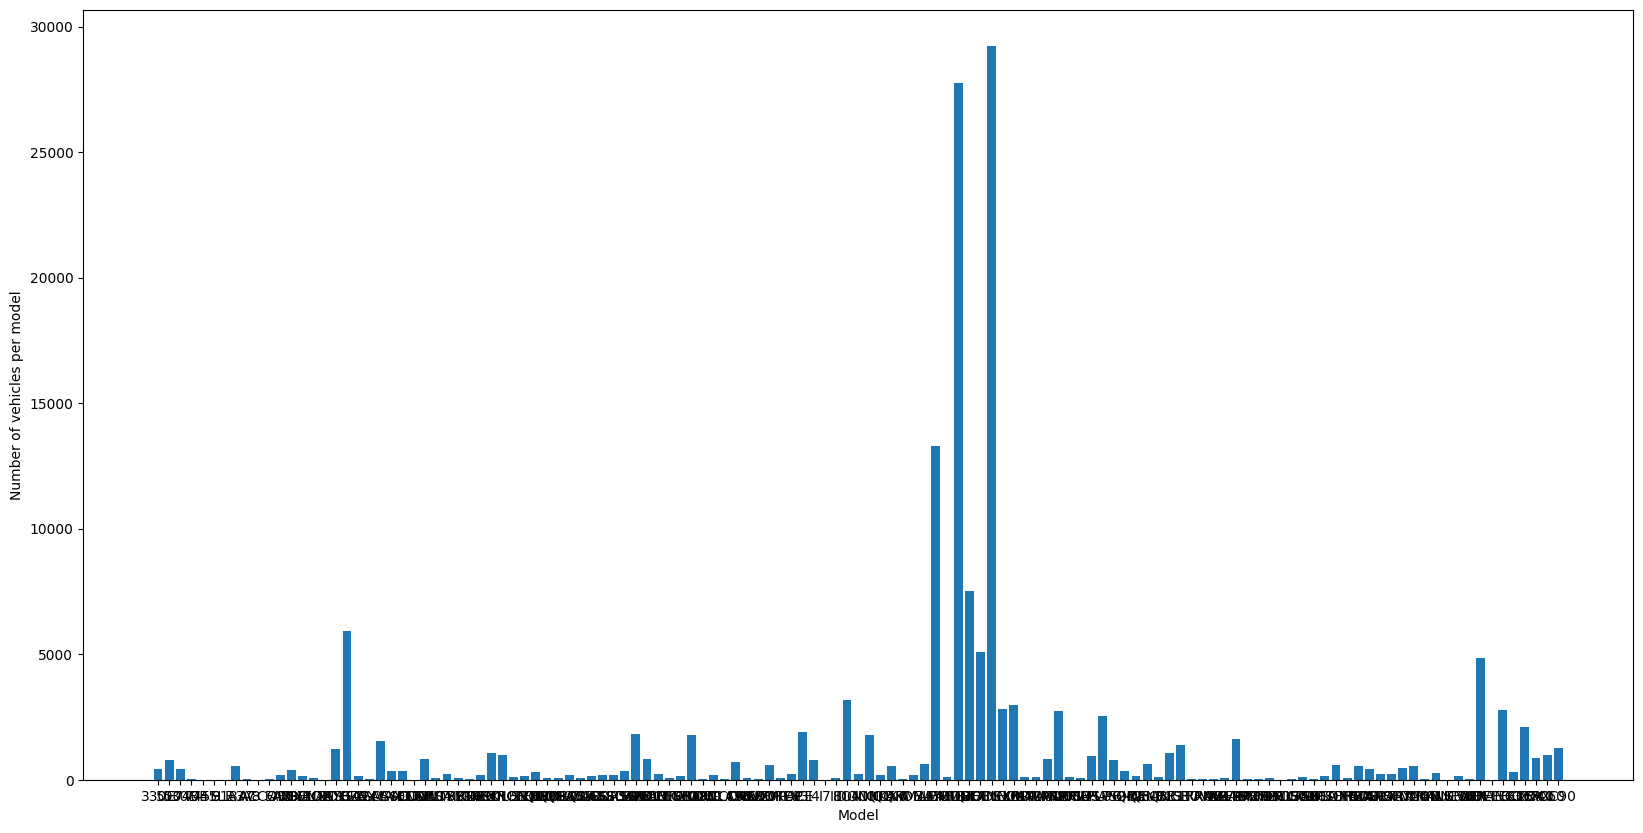

In [87]:
plt.figure(figsize=(20,10))
plt.bar(vehicles_per_model["Model"],vehicles_per_model["Number of vehicles per model"])
plt.xlabel("Model")
plt.ylabel("Number of vehicles per model")
plt.show()

In [88]:
# Model with highest number of vehicles
vehicles_per_model.loc[vehicles_per_model["Number of vehicles per model"] == vehicles_per_model["Number of vehicles per model"].max()]

,Model,Number of vehicles per model
75,MODEL Y,29209


In [89]:
# Model with lowest number of vehicles
vehicles_per_model.loc[vehicles_per_model["Number of vehicles per model"] == vehicles_per_model["Number of vehicles per model"].min()]

,Model,Number of vehicles per model
6,918,1
15,BENTAYGA,1
60,I7,1
101,S-10 PICKUP,1


4. Top Electric Vehicle Makes:

    What are the top 5 electric vehicle makes in the dataset?

In [90]:
make_vehicle = df.groupby("Make").size().reset_index(name="Make Count")
make_vehicle.sort_values(by=["Make Count"],ascending=False).head(5)

,Make,Make Count
31,TESLA,69601
25,NISSAN,13649
6,CHEVROLET,12242
10,FORD,7817
4,BMW,6620


    value_counts(): Typically used on a Series to count the occurrences of unique values in that Series.
    size: Used with groupby to get the size of each group in a DataFrame. It is often used in conjunction with groupby to count occurrences within groups.

In [91]:
# using value_counts
top_5_make = df["Make"].value_counts().head(5).reset_index(name="Make Count")
top_5_make

,Make,Make Count
0,TESLA,69601
1,NISSAN,13649
2,CHEVROLET,12242
3,FORD,7817
4,BMW,6620


5. Missing Values:

    Are there any missing values in the dataset? If yes, in which columns?

df.isna(): This generates a DataFrame of the same shape as df, where each element is True if the corresponding element in df is NaN (missing), and False otherwise.

.sum(): When you apply sum() to a DataFrame of boolean values, it treats True as 1 and False as 0. So, it sums up the True values along each column, giving you the count of missing values for each column.

In [92]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 339
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [93]:
df.shape

(153830, 17)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153830 entries, 0 to 153829
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         153830 non-null  object 
 1   County                                             153827 non-null  object 
 2   City                                               153827 non-null  object 
 3   State                                              153830 non-null  object 
 4   Postal Code                                        153827 non-null  float64
 5   Model Year                                         153830 non-null  int64  
 6   Make                                               153830 non-null  object 
 7   Model                                              153830 non-null  object 
 8   Electric Vehicle Type                              153830 non-null  object

1. City-wise Electric Vehicles:

    What are the top 10 cities with the highest number of electric vehicles?

In [95]:
top_10_cities = df["City"].value_counts().reset_index(name="Number of electric vehicles")
top_10_cities.head(10)

,City,Number of electric vehicles
0,Seattle,26153
1,Bellevue,7810
2,Redmond,5597
3,Vancouver,5429
4,Bothell,4930
5,Kirkland,4699
6,Sammamish,4485
7,Renton,4169
8,Olympia,3718
9,Tacoma,3184


2. Electric Range Distribution:

    How is the electric range distributed among the electric vehicles?

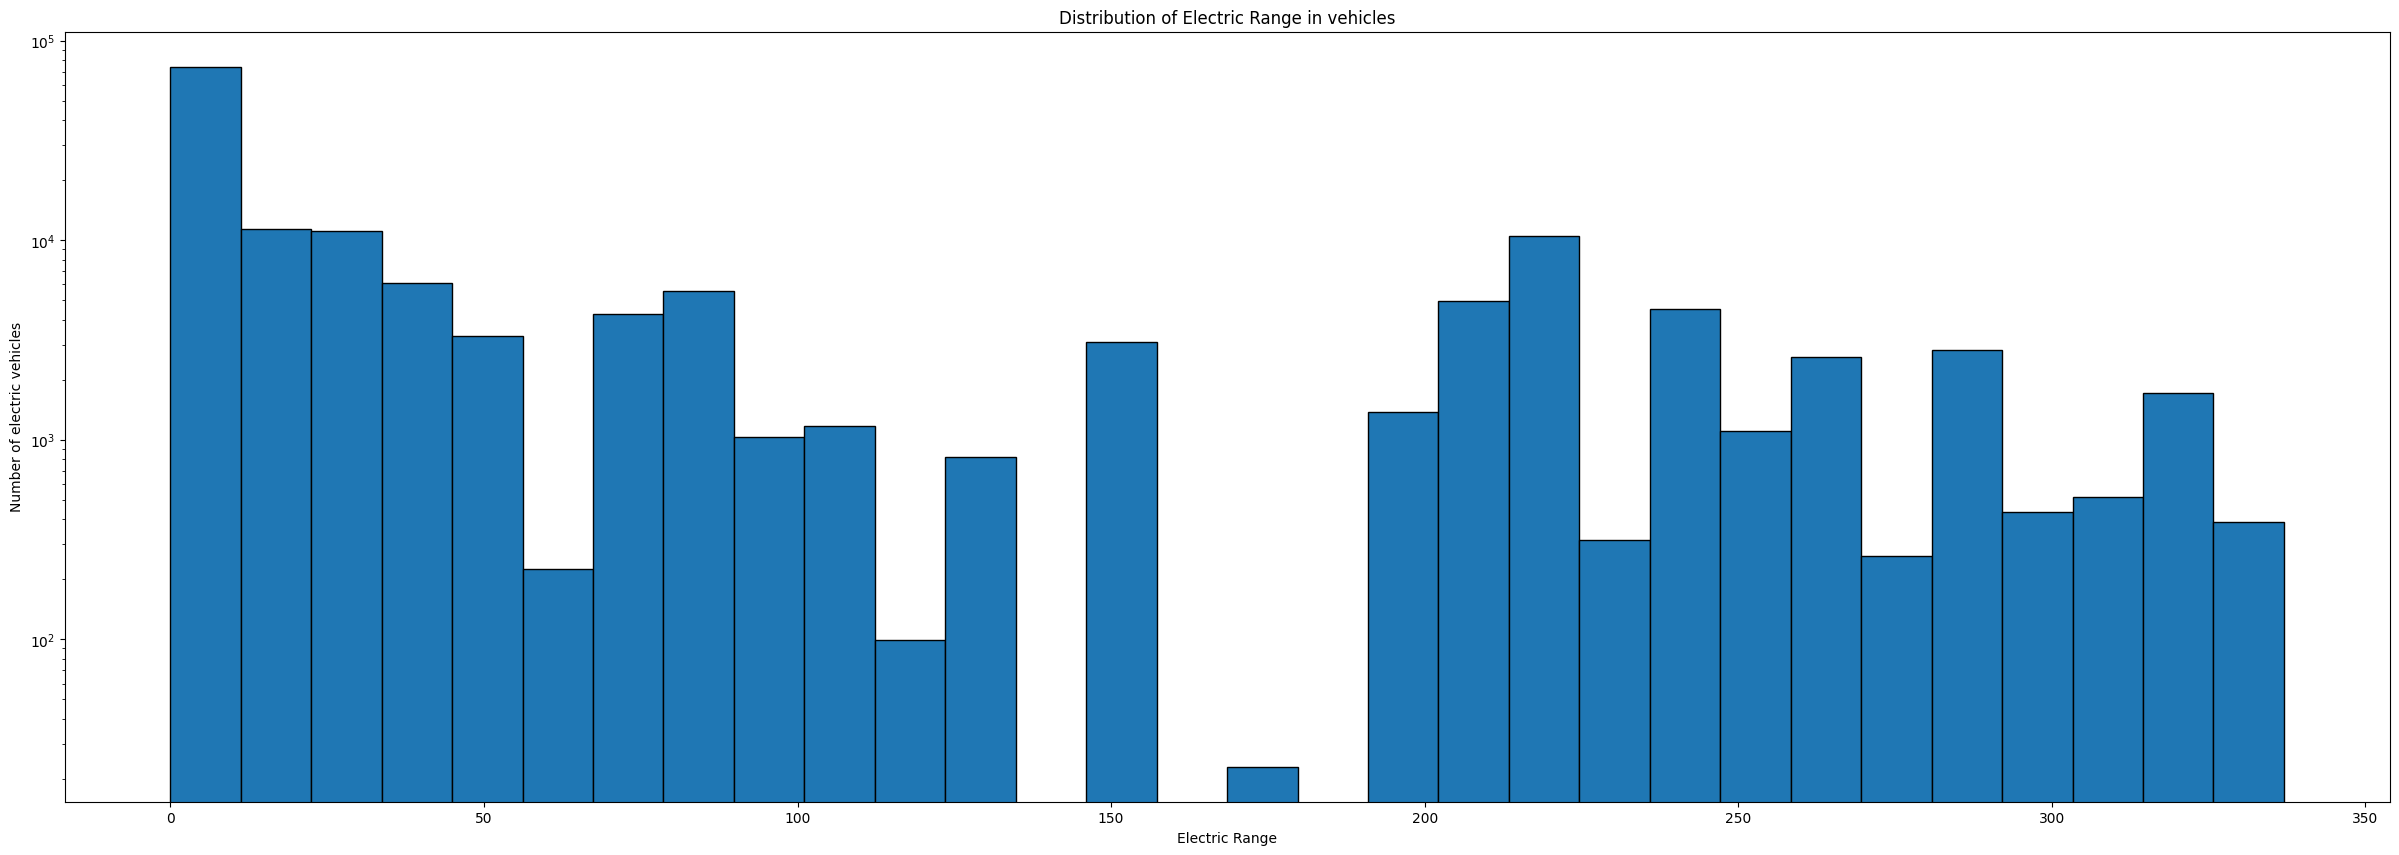

In [96]:
plt.figure(figsize=(30,10))
plt.hist(df["Electric Range"],bins=30,edgecolor="black",log=True)
plt.xlabel("Electric Range")
plt.ylabel("Number of electric vehicles")
plt.title("Distribution of Electric Range in vehicles")

plt.show()

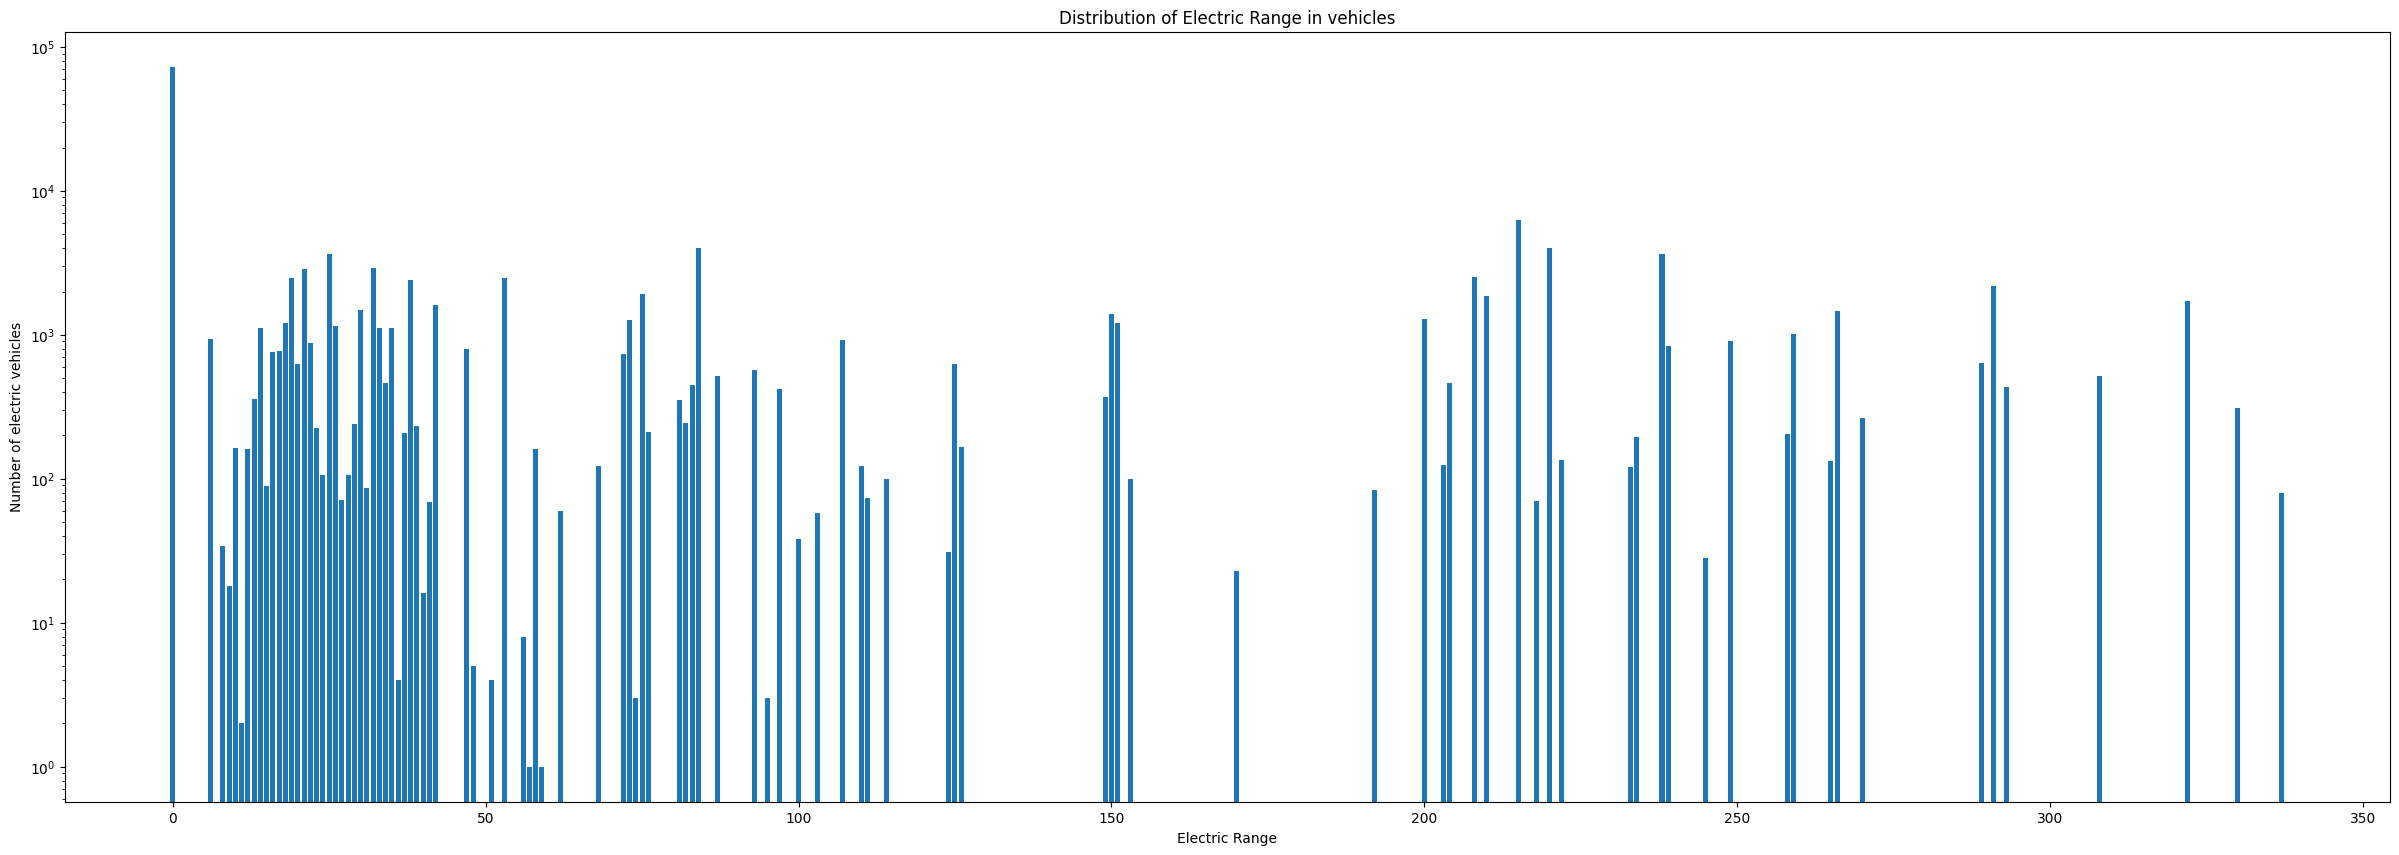

In [97]:
elecric_range = df["Electric Range"].value_counts().reset_index(name="Number of electric vehicles")

plt.figure(figsize=(30,10))
plt.bar(elecric_range["Electric Range"],elecric_range["Number of electric vehicles"],log=True)
plt.xlabel("Electric Range")
plt.ylabel("Number of electric vehicles")
plt.title("Distribution of Electric Range in vehicles")

plt.show()

3. Base MSRP Analysis:

    Can you visualize the distribution of Base MSRP for electric vehicles?

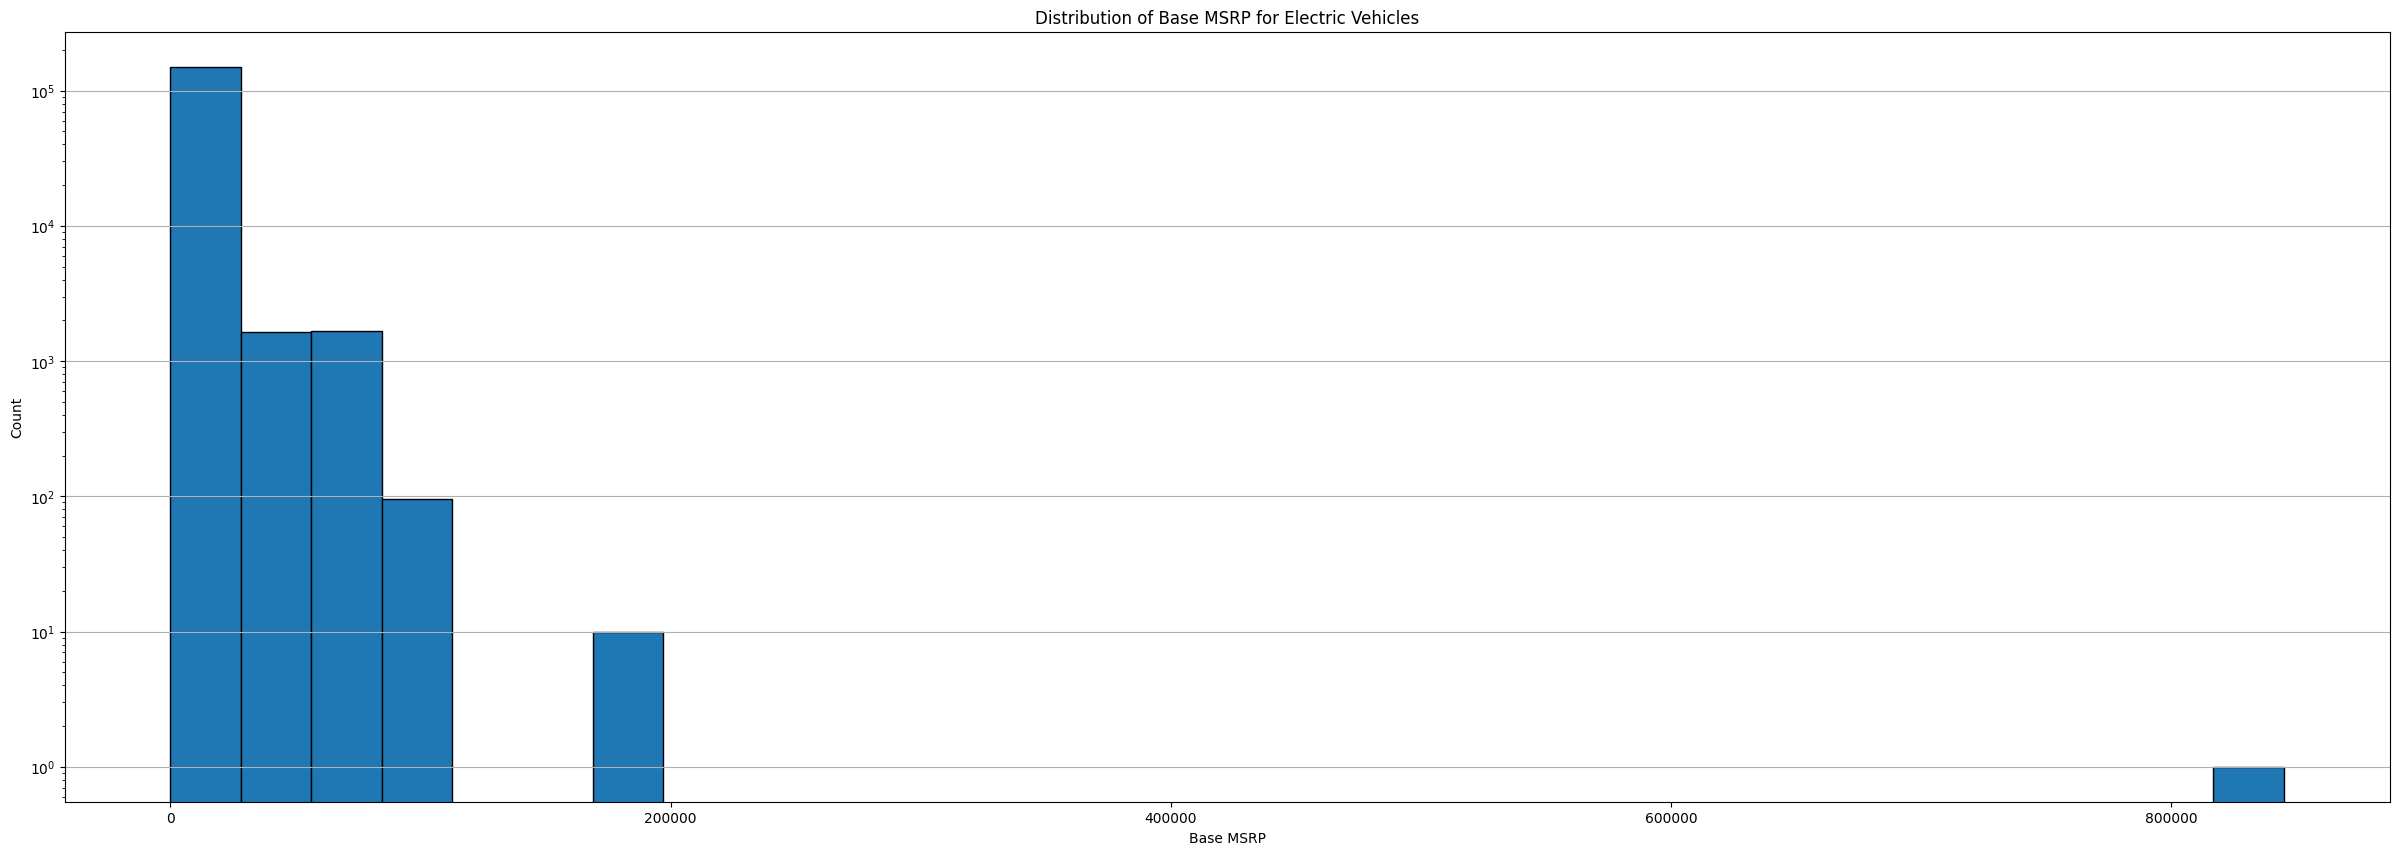

In [98]:
plt.figure(figsize=(30,10))

plt.hist(x=df["Base MSRP"],bins=30,edgecolor="black",log=True)
plt.xlabel("Base MSRP")
plt.ylabel("Count")
plt.title("Distribution of Base MSRP for Electric Vehicles")
plt.grid(axis="y")

plt.show()

Used a logrithmic scale because the distribution was highly skewed

4. Vehicle Eligibility:

    How many electric vehicles are eligible for Clean Alternative Fuel Vehicle (CAFV)?

In [99]:
number_eligible_cafv = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Clean Alternative Fuel Vehicle Eligible"]
number_eligible_cafv["County"].count()

62882

5. Legislative District Analysis:

    Is there a correlation between the legislative district and the number of electric vehicles?

In [100]:
legislative_district_analysis = df.groupby("Legislative District")["Base MSRP"].count().reset_index(name="Number of electric vehicles")
correlation = legislative_district_analysis["Legislative District"].corr(legislative_district_analysis["Number of electric vehicles"])
correlation

0.4100388008641973

1. Geospatial Visualization:

    Can you create a geospatial plot showing the distribution of electric vehicles across different states?

In [101]:
import geoplot as gplt
import geopandas as gpd
from shapely.geometry import Point

str

In [102]:
df = df.dropna()

In [103]:
df['Vehicle Location'] = df['Vehicle Location'].apply(lambda x: Point(float((x).split()[1][1:]), float(x.split()[2][:-1])))
geo_df = gpd.GeoDataFrame(df,geometry=df['Vehicle Location'].apply(Point))

/tmp/ipykernel_4880/1402568590.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  wa_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


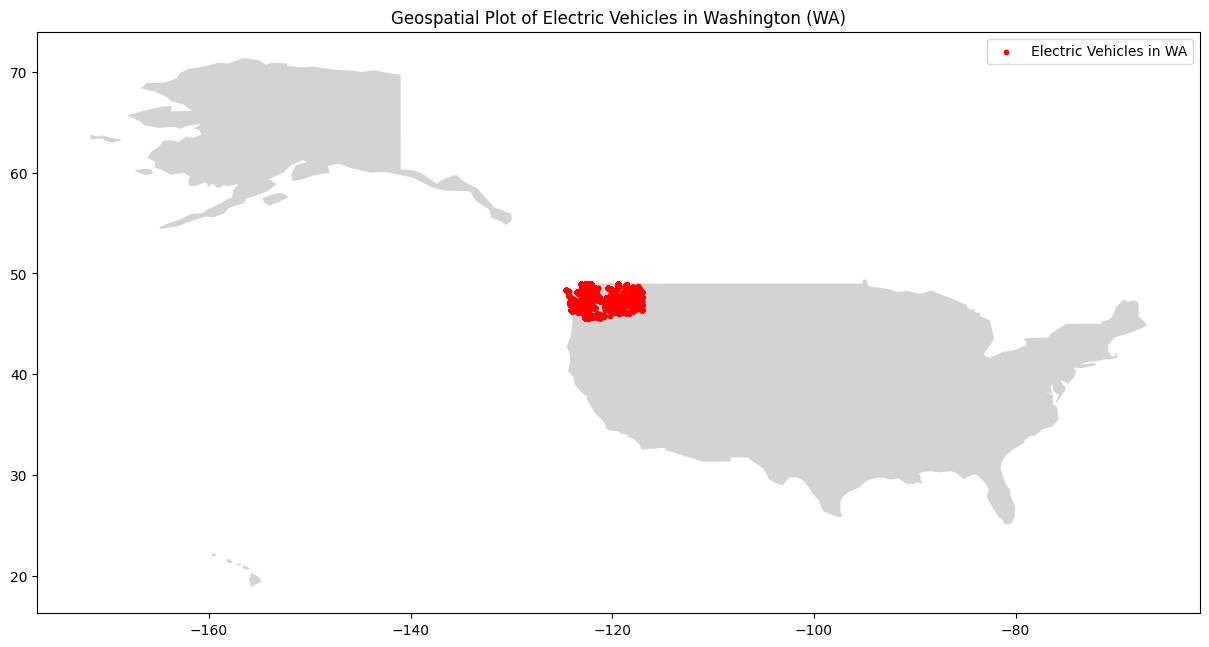

In [105]:
# Load a map of Washington state
wa_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
wa_map = wa_map[wa_map['iso_a3'] == 'USA']
wa_map = wa_map[wa_map['name'] == 'United States of America']

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
wa_map.plot(ax=ax, color='lightgrey')

# Plot the geospatial data on top of the map
geo_df.plot(ax=ax, color='red', markersize=10, label='Electric Vehicles in WA')

plt.title('Geospatial Plot of Electric Vehicles in Washington (WA)')
plt.legend()
plt.show()

2. Correlation Matrix:

    What is the correlation matrix between numerical columns in the dataset?

3. Interactive Visualization:

    Can you create an interactive visualization (e.g., using Plotly or Bokeh) to explore different aspects of the dataset?

4. Time Series Analysis:

    How has the number of electric vehicles evolved over the years? (Useful if the dataset spans multiple years)

5. Predictive Modeling Visualization:

    If applicable, visualize the results of any predictive modeling you perform on this dataset.

1. Cluster Analysis:

    Can you identify clusters of electric vehicles based on features like electric range, base MSRP, and model year?

2. Network Analysis:

    If applicable, is there any network structure in the data that can be visualized?

3. Custom Visualization:

    Create a unique and insightful visualization that provides a deep understanding of a specific aspect of the dataset.